# The Social Implications of Food: Data Cleaning

## Introduction
This project for INFO 2950 provides an analysis of restaurant review data from Yelp. I focused on identifying relationships between the three separate JSON files for businesses, users, and reviews, in order to see whether insights could be derived from the restaurants that users patronize and their friends. 

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Cleaning 
### Business Information
The Yelp dataset for businesses includes information on a variety of businesses as seen by the "categories" column, ranging from auto repair shops to malls to food. In this project, only the restaurant information is being analyzed so other information can be removed. Some business profiles had missing or insufficient categories so those were removed since it is difficult to classify these businesses without the proper context. The initial business information was a lot of data, much of which was not relevant, so the size of the dataset shrank from about 200,000 businesses to under 30,000 restaurants and some information on the restaurant's operating hours and specific address were also removed for being out of scope. Also, I chose to only keep businesses with over a certain amount of reviews, since less popular restaurants likely have less representative profiles in regards to their average star rating. Since some columns within the business table and the user table have the same name, I also renamed some columns to clearly distinguish the fields as restaurant coulumns.

In [12]:
business_data = pd.read_json("yelp_dataset/yelp_academic_dataset_business.json", lines=True)
print("Original business dataset size:",len(business_data))

Original business dataset size: 209393


In [13]:
business_data_noNaN = business_data.dropna() # remove rows with missing information
print("Business dataset size after removing NaN values:",len(business_data_noNaN))
# get only restaurant information whihc has at least one other category (i.e cuisine type)
intermediary_restaurants = business_data_noNaN[business_data_noNaN['categories'].str.contains("Restaurants") & business_data_noNaN['categories'].str.contains(",") ]
#remove shopping centers (since it's not a specific place)
intermediary_restaurants = intermediary_restaurants[~intermediary_restaurants['categories'].str.contains("Shopping Centers")]
print("Business dataset for only restaurants size:", len(intermediary_restaurants))
intermediary_restaurants.head(50)

Business dataset size after removing NaN values: 146796
Business dataset for only restaurants size: 49868


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
8,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,404 E Green St,Champaign,IL,61820,40.110446,-88.233073,4.5,5,1,"{'RestaurantsAttire': 'u'casual'', 'Restaurant...","Ethnic Food, Food Trucks, Specialty Food, Impo...","{'Monday': '11:30-14:30', 'Tuesday': '11:30-14..."
24,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,"15480 Bayview Avenue, unit D0110",Aurora,ON,L4G 7J1,44.010962,-79.448677,4.5,4,1,"{'RestaurantsTableService': 'False', 'Restaura...","Restaurants, Cheesesteaks, Poutineries","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
30,9sRGfSVEfLhN_km60YruTA,Apadana Restaurant,13071 Yonge Street,Richmond Hill,ON,L4E 1A5,43.947011,-79.454862,3.0,3,1,"{'Ambience': '{'touristy': False, 'hipster': F...","Persian/Iranian, Turkish, Middle Eastern, Rest...","{'Tuesday': '12:0-21:0', 'Wednesday': '12:0-21..."
33,vjTVxnsQEZ34XjYNS-XUpA,Wetzel's Pretzels,"4550 East Cactus Rd, #KSFC-4",Phoenix,AZ,85032,33.602822,-111.983533,4.0,10,1,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...","Food, Pretzels, Bakeries, Fast Food, Restaurants","{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'..."
41,98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,"1541 E 38th St, Ste 101",Cleveland,OH,44114,41.512155,-81.663332,4.5,23,1,"{'BusinessParking': 'None', 'Ambience': '{'tou...","Restaurants, Vietnamese, Soup","{'Monday': '11:0-20:0', 'Wednesday': '11:0-20:..."
42,fhNf_sg-XzZ3e7HEVGuOZg,Meat Chix And Wieners,6530 S Decatur Blvd,Las Vegas,NV,89118,36.071196,-115.207463,3.0,10,0,"{'RestaurantsPriceRange2': '2', 'BusinessParki...","Burgers, Restaurants, American (Traditional), ...","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
44,Ga2Bt7xfqoggTypWD5VpoQ,Amando's Bros,2602 W Southern Ave,Tempe,AZ,85282,33.393199,-111.976270,4.0,9,0,"{'Caters': 'False', 'RestaurantsGoodForGroups'...","Mexican, Restaurants","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
49,tLpkSwdtqqoXwU0JAGnApw,Wendy's,4602 Northfield Road,Cleveland,OH,44128,41.434614,-81.527026,3.5,7,1,"{'RestaurantsDelivery': 'False', 'BusinessAcce...","Restaurants, Fast Food, Burgers","{'Monday': '10:0-3:0', 'Tuesday': '10:0-3:0', ..."
61,-qjn24n8HYF6It9GQrQntw,Five Guys Burgers and Fries,2130 E Arbors Dr,Charlotte,NC,28262,35.338070,-80.757397,4.0,15,0,"{'RestaurantsReservations': 'False', 'Restaura...","Fast Food, American (New), Restaurants, Burgers","{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'..."
63,ZkzutF0P_u0C0yTulwaHkA,Lelulos Pizzeria,311 Unity Center Rd,Plum,PA,15239,40.489996,-79.779288,4.0,31,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Restaurants, Pizza","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:0', ..."


In [17]:
intermediary_restaurants.dtypes # to get an overview of the restaurant columns, see which aren't needed

business_id      object
name             object
address          object
city             object
state            object
postal_code      object
latitude        float64
longitude       float64
stars           float64
review_count      int64
is_open           int64
attributes       object
categories       object
hours            object
dtype: object

In [15]:
#create final restaurant dataframe, clean up some irrelevant columns for reader clarity
restaurants = intermediary_restaurants.drop(columns=['is_open', 'attributes', 'hours', 'address'])
restaurants.head()

,business_id,name,city,state,postal_code,latitude,longitude,stars,review_count,categories
8,pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,Champaign,IL,61820,40.110446,-88.233073,4.5,5,"Ethnic Food, Food Trucks, Specialty Food, Impo..."
24,eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,Aurora,ON,L4G 7J1,44.010962,-79.448677,4.5,4,"Restaurants, Cheesesteaks, Poutineries"
30,9sRGfSVEfLhN_km60YruTA,Apadana Restaurant,Richmond Hill,ON,L4E 1A5,43.947011,-79.454862,3.0,3,"Persian/Iranian, Turkish, Middle Eastern, Rest..."
33,vjTVxnsQEZ34XjYNS-XUpA,Wetzel's Pretzels,Phoenix,AZ,85032,33.602822,-111.983533,4.0,10,"Food, Pretzels, Bakeries, Fast Food, Restaurants"
41,98hyK2QEUeI8v2y0AghfZA,Pho Lee's Vietnamese Restaurant,Cleveland,OH,44114,41.512155,-81.663332,4.5,23,"Restaurants, Vietnamese, Soup"


Since restaurants without many reviews likely have innaccurate star ratings given the small sample size, I used a boxplot to identify a threshold for review count.

Text(0, 0.5, 'Number of Reviews Per Restuarant')

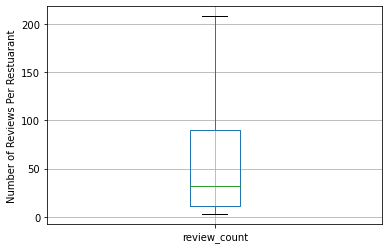

In [16]:
boxplot = restaurants.boxplot(column=['review_count'], showfliers=False)
plt.ylabel('Number of Reviews Per Restuarant')

The median in this boxplot was found to be a little more that 25 reviews per restaurant. To preserve the majority of the data while reducing inaccurate restaurant ratings, I set the threshold for restaurant_review_count to be 25.

In [18]:
restaurants.drop(restaurants[restaurants['review_count'] < 25].index, inplace = True)
print("Filtered restaurant dataset size:",len(restaurants))

Filtered restaurant dataset size: 28509


In [19]:
restaurants = restaurants.rename(columns={"stars": "restaurant_avg_stars", "name": "restaurant_name", "review_count": "restaurant_review_count"}) #rename column to avoid naming conflicts with review table's stars
restaurants.to_csv("yelp_restaurants.csv",index=False) #export this smaller df to CSV to avoid having to parse large JSON again

The cleaned restaurant table was then saved to a CSV.

### User Information
The user data was difficult to work with as it was a large set of information (over 3GB) that took a lot of time to simply parse. However, by having information on so many users, from a data analysis perspective, finding and verifying relationships will be easier and more trustworthy given the larger sample size. Since user preferences are being derived based on user reviews, users without many reviews were removed. Additionally, I focused on only a few features of each user -- their id (used to uniquely identify them), name (possibly useful for finding gender bias), review count, average stars, friends -- that are relevant to the potential research questions at hand. Once this data was filtered, I saved the smaller dataframe into a CSV to avoid having to go through the entire data cleaning process again.

In [26]:
user_data = pd.read_json("yelp_dataset/yelp_academic_dataset_user.json", lines=True)
print("Original user dataset size:",len(user_data))

Original user dataset size: 1968703


In [27]:
user_data.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,ntlvfPzc8eglqvk92iDIAw,Rafael,553,2007-07-06 03:27:11,628,225,227,,"oeMvJh94PiGQnx_6GlndPQ, wm1z1PaJKvHgSDRKfwhfDg...",14,...,2,1,0,1,11,15,22,22,10,0
1,FOBRPlBHa3WPHFB5qYDlVg,Michelle,564,2008-04-28 01:29:25,790,316,400,"2008,2009,2010,2011,2012,2013","ly7EnE8leJmyqyePVYFlug, pRlR63iDytsnnniPb3AOug...",27,...,4,5,2,1,33,37,63,63,21,5
2,zZUnPeh2hEp0WydbAZEOOg,Martin,60,2008-08-28 23:40:05,151,125,103,2010,"Uwlk0txjQBPw_JhHsQnyeg, Ybxr1tSCkv3lYA0I1qmnPQ...",5,...,6,0,1,0,3,7,17,17,4,1
3,QaELAmRcDc5TfJEylaaP8g,John,206,2008-09-20 00:08:14,233,160,84,2009,"iog3Nyg1i4jeumiTVG_BSA, M92xWY2Vr9w0xoH8bPplfQ...",6,...,1,0,0,0,7,14,7,7,2,0
4,xvu8G900tezTzbbfqmTKvA,Anne,485,2008-08-09 00:30:27,1265,400,512,"2009,2010,2011,2012,2014,2015,2016,2017,2018","3W3ZMSthojCUirKEqAwGNw, eTIbuu23j9tOgmIa9POyLQ...",78,...,9,2,1,1,22,28,31,31,19,31


In [29]:
#clean up some irrelevant columns for reader clarity
users_with_reviews = user_data[['user_id', 'name','review_count', 'yelping_since', 'average_stars', 'friends']].copy()

In [30]:
users_with_reviews.head()

,user_id,name,review_count,yelping_since,average_stars,friends
0,ntlvfPzc8eglqvk92iDIAw,Rafael,553,2007-07-06 03:27:11,3.57,"oeMvJh94PiGQnx_6GlndPQ, wm1z1PaJKvHgSDRKfwhfDg..."
1,FOBRPlBHa3WPHFB5qYDlVg,Michelle,564,2008-04-28 01:29:25,3.84,"ly7EnE8leJmyqyePVYFlug, pRlR63iDytsnnniPb3AOug..."
2,zZUnPeh2hEp0WydbAZEOOg,Martin,60,2008-08-28 23:40:05,3.44,"Uwlk0txjQBPw_JhHsQnyeg, Ybxr1tSCkv3lYA0I1qmnPQ..."
3,QaELAmRcDc5TfJEylaaP8g,John,206,2008-09-20 00:08:14,3.08,"iog3Nyg1i4jeumiTVG_BSA, M92xWY2Vr9w0xoH8bPplfQ..."
4,xvu8G900tezTzbbfqmTKvA,Anne,485,2008-08-09 00:30:27,4.37,"3W3ZMSthojCUirKEqAwGNw, eTIbuu23j9tOgmIa9POyLQ..."


Some users may have a few reviews, but still not enough to draw good insights. I created a box plot on the review_count to determine what would be a reasonable number of reviews to act as the cutoff. There were a few outliers with a lot of reviews, making the boxplot difficult to see, so I removed the outliers in the visualization.

Text(0, 0.5, 'Number of Reviews per User')

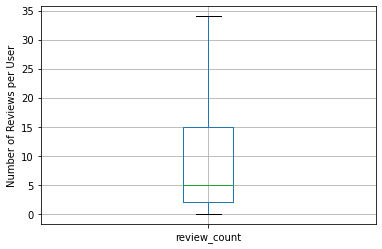

In [31]:
boxplot = users_with_reviews.boxplot(column=['review_count'], showfliers=False)
plt.ylabel('Number of Reviews per User')

Initially, I was unsure what review count cutoff to implement to determine user preferences. I considered using the median number of reviews as the cutoff value, but I don't think that such a small sample size (5 reviews) could be representative of a user's taste. Furthermore, there is a chance that some reviews may be for businesses that are not restaurants, and thus are not included in the analysis. I hoped to use a higher number to be more confident in my analysis of user preferences but, noting from the boxplot that the upper quartile of Yelp users only has 15 reviews at the minimum, I decided to use 15 reviews as my cutoff. The outliers of people with over 35 reviews also likely has eating habits that are not similar to most Yelp users, so they were removed as well. While the most active 25% of reviewers (excluding outliers) may seem like a small population size, this still includes over half a million users. Based on further analyses on whether  cuisine preferences and reviews are strongly correlated, these cutoffs can be adjusted to a higher or lower number.

In [11]:
users_with_reviews.drop(users_with_reviews[users_with_reviews['review_count'] < 15].index, inplace = True) # remove users with under 15 reviews
users_with_reviews.drop(users_with_reviews[users_with_reviews['review_count'] > 35].index, inplace = True) # remove users with over 35 reviews
print(len(users_with_reviews))

271493


Given that this project explores the relationship between social circles and user preferences, we only want the users who have friends on Yelp. Since the list of friend is delineated by commas, I counted the friends based on the number of comma separators.

In [12]:
users_with_reviews['friend_count'] = users_with_reviews.apply (lambda row: row["friends"].count(",")+1, axis=1)
users_with_reviews.head()

,user_id,name,review_count,yelping_since,average_stars,friends,friend_count
17,6bbHSJ0PrgSxh7e5nigKMw,Drew,15,2011-04-04 01:57:51,2.21,"P7X4XYW_bmEo_ccaH5Yxrw, JiaJJzXFc6vBPke9v_V9Uw...",302
46,rhQl_JFkCwrj0Rb8HUrNRQ,Angela,31,2010-10-14 03:00:26,3.52,"mo9Ahi0blBIbmxCXIzO2-g, hEu2jJV-bKOpR7Z5d19gkA...",19
50,95_gm871QEoVp9WCofuQug,Shannon,18,2010-03-22 22:02:22,3.74,"pv-AOoZXrWQpvfSi7lkFvw, SNEWS4W27vrnGwNqYjQT5A...",964
66,Yj90cDY-Z7zBHXKqLzcwIw,Gabrielle,35,2011-06-22 20:49:31,3.67,"UpuMhfwlBsqw8Ek4XexSsw, -OL3xb9ZZwAju_ACxptCgg...",868
70,l8IP6fObyuueE0s1drIy8A,JP,34,2010-03-18 20:48:31,3.66,"m4-0aN5ccqG3xKgF8ph1HA, 3KylATQZ-5B7yDlCiRWzcA...",19


Text(0, 0.5, 'Number of Friends')

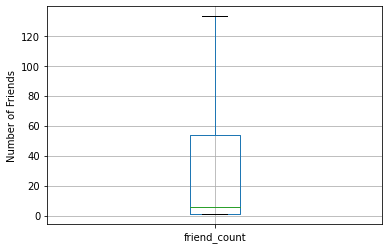

In [13]:
users_with_reviews.boxplot(column ='friend_count', showfliers=False)
plt.ylabel('Number of Friends')

The friend count evidently varies by a large margin. On the upper end of the scale, having too many Yelp friends makes it difficult to decipher who is actually a close friend and the "friend circle" is not as strong of a relationship. Having too few friends is also an issue since I wouldn't have many friends to aggregate the data for, and each friend will have an overly strong influence on the prediction. Obeserving the wide range of users within the 3rd quartile, I chose to focus on this group. Specifically, to get rid of the issue of overly small or large sample sizes of friends per user, I chose to filter the user base down to users between 20 and 40 friends as that in the center of the 3rd quartile.

In [14]:
users_with_reviews.drop(users_with_reviews[users_with_reviews['friend_count'] < 20 ].index, inplace = True)
users_with_reviews.drop(users_with_reviews[users_with_reviews['friend_count'] > 40 ].index, inplace = True)
print("The reduced number of users:", len(users_with_reviews))

The reduced number of users: 25278


In [15]:
users_with_reviews.to_csv("yelp_users.csv",index=False) #export this smaller df to CSV to avoid having to parse large JSON again

### Review Information
The review data, which includes the full text of the review along with the corresponding user_id and business_id, was a massive 6 GB file with over 8 million reviews that was ever more cumbersome to parse. I only kept the relevant columns to the analysis, notable removing the text, which helped decrease storage size. Additionally, I only wanted the subset of reviews that were for restaurants (as determined by the "Data Cleaning for Business Information" section of this project) and created by relevant users (as determined by the "Data Cleaning for User Information" section of this project).

In [3]:
review_data = pd.read_json("yelp_dataset/yelp_academic_dataset_review.json", lines=True)

In [4]:
print("Total number of reviews in dataset:", len(review_data))
review_data.head()

Total number of reviews in dataset: 8021122


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2,5,0,0,"As someone who has worked with many museums, I...",2015-04-15 05:21:16
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1,1,1,0,I am actually horrified this place is still in...,2013-12-07 03:16:52
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5,1,0,0,I love Deagan's. I do. I really do. The atmosp...,2015-12-05 03:18:11
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1,0,0,0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" g...",2011-05-27 05:30:52
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4,0,0,0,"Oh happy day, finally have a Canes near my cas...",2017-01-14 21:56:57


In [5]:
review_data.dtypes

review_id              object
user_id                object
business_id            object
stars                   int64
useful                  int64
funny                   int64
cool                    int64
text                   object
date           datetime64[ns]
dtype: object

In [6]:
review_data_filtered = review_data[['review_id', 'user_id', 'business_id' ,'stars']].copy()
review_data_filtered.head()

,review_id,user_id,business_id,stars
0,xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2
1,UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1
2,LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5
3,i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1
4,6TdNDKywdbjoTkizeMce8A,UgMW8bLE0QMJDCkQ1Ax5Mg,IS4cv902ykd8wj1TR0N3-A,4


In [19]:
users = pd.read_csv("yelp_users.csv") # get the cleaned user info from the CSV I created

In [8]:
restaurants = pd.read_csv("yelp_restaurants.csv")# get the cleaned restaurant info from the CSV I created
restaurants.head()

,business_id,restaurant_name,city,state,postal_code,latitude,longitude,restaurant_avg_stars,restaurant_review_count,categories
0,ZkzutF0P_u0C0yTulwaHkA,Lelulos Pizzeria,Plum,PA,15239,40.489996,-79.779288,4.0,31,"Restaurants, Pizza"
1,0QjROMVW9ACKjhSEfHqNCQ,Mi Mi Restaurant,Toronto,ON,M4M 1Y3,43.666376,-79.348773,4.0,116,"Vietnamese, Restaurants"
2,7j0kor_fkeYhyEpXh4OpnQ,Scramblers - Strongsville,Strongsville,OH,44136,41.295689,-81.835722,3.5,81,"Breakfast & Brunch, Restaurants, American (Tra..."
3,j9bWpCRwpDVfwVT_V85qeA,Papaya Thai,Mesa,AZ,85213,33.423705,-111.772890,2.5,130,"Food, Ethnic Food, Specialty Food, Restaurants..."
4,W7hCuNdn2gzehta6eSHzgQ,Pete's Fish & Chips,Tempe,AZ,85281,33.414507,-111.923721,2.0,117,"Restaurants, Fish & Chips, Seafood"


In [10]:
# get the restaurant info per review
review_with_restaurant = pd.merge(review_data_filtered, restaurants, how='inner', on='business_id').dropna()

In [11]:
print("Number of reviews with corresponding restaurants:",len(review_with_restaurant))

Number of reviews with corresponding restaurants: 4564835


In [25]:
# filter the reviews to only include those created by users listed in users DF
review_for_users = pd.merge(users, review_with_restaurant, how='inner', on='user_id')
review_for_users.head()

,user_id,name,review_count,average_stars,friends,friend_count,review_id,business_id,stars,restaurant_name,city,state,postal_code,latitude,longitude,restaurant_avg_stars,restaurant_review_count,categories
0,CvYFllSy1cTPQu5nVDi8ew,Marleana,23,3.78,"EgyX7VrnvJPGq0qaLTGWOw, cvR3DfSxPIvsHXmg_NLzXw...",35,W3Hfb8Hl_-ESdVqgY7ChLA,lvFmpUptBSGxVQBig0RdpA,5,House of Manchester Primal Brasserie -Organic ...,North Las Vegas,NV,89030,36.201166,-115.138936,4.5,120,"Barbeque, Restaurants, Coffee & Tea, Juice Bar..."
1,CvYFllSy1cTPQu5nVDi8ew,Marleana,23,3.78,"EgyX7VrnvJPGq0qaLTGWOw, cvR3DfSxPIvsHXmg_NLzXw...",35,WJ1wr8l3t-TZ-F2d5fwYtg,bjllusUsLq9zE4yZnLpOzg,5,Shawarma Plus,Las Vegas,NV,89118,36.071159,-115.207385,4.0,553,"Lebanese, Vegetarian, Middle Eastern, Specialt..."
2,d1cShRS35tKowA4SWMV8oA,Katie,17,4.00,"73sZBy7fIKkA7bApBCct5Q, iPBYTezWHanKZm820UN-oQ...",31,TvF-rBfa3anVHglCYC9Nzw,cTJjTKz2huGZ-ElScC2pSw,5,Windsor,Phoenix,AZ,85012,33.513575,-112.073381,4.0,1207,"Bars, Breakfast & Brunch, Pubs, American (New)..."
3,d1cShRS35tKowA4SWMV8oA,Katie,17,4.00,"73sZBy7fIKkA7bApBCct5Q, iPBYTezWHanKZm820UN-oQ...",31,GNAWIr2hKxUVVf6jqDKOwA,PVTfzxu7of57zo1jZwEzkg,2,FEZ,Phoenix,AZ,85012,33.491695,-112.073498,4.0,1028,"Restaurants, Mediterranean, American (New), Lo..."
4,pi6vmI4MCR52OBuxxJ3Kiw,John,23,3.32,"aDMWjbpdVrSdp3m3eJ_XCg, 0LV5b61w4bXHr_DJ_ncUfQ...",34,nHuBbfogu8pXr7T9aH9Svw,KalAJyO0Zpg3K1wVwYXBHA,4,Marché Bacchus,Las Vegas,NV,89128,36.207539,-115.268154,3.5,817,"Food, Beer, Wine & Spirits, Wine Bars, Nightli..."


In [26]:
print("Number of reviews with corresponding restaurants and users:",len(review_for_users))

Number of reviews with corresponding restaurants and users: 87626


In [27]:
review_for_users.to_csv("yelp_reviews.csv",index=False) #export this smaller df to CSV to avoid having to parse large JSON again

### Analysis Ready Dataset
After merging the users, reviews, and restaurants with inner joins, the resultant dataset still contained over 90 MB of information on a per review basis. This needed to be further filtered to make sure there was enough data for each respective user in regards to their number of reviews per category (at least two) and number of categories per user (at least 3). The finalized analysis ready dataset includes two files: "yelp_user_category_groups.csv" and "yelp_filtered users".

In [2]:
review_for_users = pd.read_csv("yelp_reviews.csv") # get the cleaned review info from the CSV I created
review_for_users.head()

,user_id,name,review_count,average_stars,friends,friend_count,review_id,business_id,stars,restaurant_name,city,state,postal_code,latitude,longitude,restaurant_avg_stars,restaurant_review_count,categories
0,CvYFllSy1cTPQu5nVDi8ew,Marleana,23,3.78,"EgyX7VrnvJPGq0qaLTGWOw, cvR3DfSxPIvsHXmg_NLzXw...",35,W3Hfb8Hl_-ESdVqgY7ChLA,lvFmpUptBSGxVQBig0RdpA,5,House of Manchester Primal Brasserie -Organic ...,North Las Vegas,NV,89030,36.201166,-115.138936,4.5,120,"Barbeque, Restaurants, Coffee & Tea, Juice Bar..."
1,CvYFllSy1cTPQu5nVDi8ew,Marleana,23,3.78,"EgyX7VrnvJPGq0qaLTGWOw, cvR3DfSxPIvsHXmg_NLzXw...",35,WJ1wr8l3t-TZ-F2d5fwYtg,bjllusUsLq9zE4yZnLpOzg,5,Shawarma Plus,Las Vegas,NV,89118,36.071159,-115.207385,4.0,553,"Lebanese, Vegetarian, Middle Eastern, Specialt..."
2,d1cShRS35tKowA4SWMV8oA,Katie,17,4.00,"73sZBy7fIKkA7bApBCct5Q, iPBYTezWHanKZm820UN-oQ...",31,TvF-rBfa3anVHglCYC9Nzw,cTJjTKz2huGZ-ElScC2pSw,5,Windsor,Phoenix,AZ,85012,33.513575,-112.073381,4.0,1207,"Bars, Breakfast & Brunch, Pubs, American (New)..."
3,d1cShRS35tKowA4SWMV8oA,Katie,17,4.00,"73sZBy7fIKkA7bApBCct5Q, iPBYTezWHanKZm820UN-oQ...",31,GNAWIr2hKxUVVf6jqDKOwA,PVTfzxu7of57zo1jZwEzkg,2,FEZ,Phoenix,AZ,85012,33.491695,-112.073498,4.0,1028,"Restaurants, Mediterranean, American (New), Lo..."
4,pi6vmI4MCR52OBuxxJ3Kiw,John,23,3.32,"aDMWjbpdVrSdp3m3eJ_XCg, 0LV5b61w4bXHr_DJ_ncUfQ...",34,nHuBbfogu8pXr7T9aH9Svw,KalAJyO0Zpg3K1wVwYXBHA,4,Marché Bacchus,Las Vegas,NV,89128,36.207539,-115.268154,3.5,817,"Food, Beer, Wine & Spirits, Wine Bars, Nightli..."


All the categories per review were initially in a single cell, which made it difficult to parse through. Using pandas' explode() function, each review was duplicated into a separate row for each category. This enabled me to filter out certain categories such as "Restaurants" and "Food" that don't give information on the cuisine type.

In [3]:
# change comma-separated strings into lists
review_for_users['categories'] =review_for_users.apply(lambda row: row['categories'].split(','), axis=1)
review_for_users['friends'] =review_for_users.apply(lambda row: row['friends'].split(','), axis=1)

exploded_reviews = review_for_users.explode('categories')
# get rid of the restaurant and food categories since they are very generic
exploded_reviews = exploded_reviews[~exploded_reviews.categories.str.contains("Restaurants")]
exploded_reviews = exploded_reviews[~exploded_reviews.categories.str.contains("Food")]
exploded_reviews.head()

,user_id,name,review_count,average_stars,friends,friend_count,review_id,business_id,stars,restaurant_name,city,state,postal_code,latitude,longitude,restaurant_avg_stars,restaurant_review_count,categories
0,CvYFllSy1cTPQu5nVDi8ew,Marleana,23,3.78,"[EgyX7VrnvJPGq0qaLTGWOw, cvR3DfSxPIvsHXmg_NLz...",35,W3Hfb8Hl_-ESdVqgY7ChLA,lvFmpUptBSGxVQBig0RdpA,5,House of Manchester Primal Brasserie -Organic ...,North Las Vegas,NV,89030,36.201166,-115.138936,4.5,120,Barbeque
0,CvYFllSy1cTPQu5nVDi8ew,Marleana,23,3.78,"[EgyX7VrnvJPGq0qaLTGWOw, cvR3DfSxPIvsHXmg_NLz...",35,W3Hfb8Hl_-ESdVqgY7ChLA,lvFmpUptBSGxVQBig0RdpA,5,House of Manchester Primal Brasserie -Organic ...,North Las Vegas,NV,89030,36.201166,-115.138936,4.5,120,Coffee & Tea
0,CvYFllSy1cTPQu5nVDi8ew,Marleana,23,3.78,"[EgyX7VrnvJPGq0qaLTGWOw, cvR3DfSxPIvsHXmg_NLz...",35,W3Hfb8Hl_-ESdVqgY7ChLA,lvFmpUptBSGxVQBig0RdpA,5,House of Manchester Primal Brasserie -Organic ...,North Las Vegas,NV,89030,36.201166,-115.138936,4.5,120,Juice Bars & Smoothies
0,CvYFllSy1cTPQu5nVDi8ew,Marleana,23,3.78,"[EgyX7VrnvJPGq0qaLTGWOw, cvR3DfSxPIvsHXmg_NLz...",35,W3Hfb8Hl_-ESdVqgY7ChLA,lvFmpUptBSGxVQBig0RdpA,5,House of Manchester Primal Brasserie -Organic ...,North Las Vegas,NV,89030,36.201166,-115.138936,4.5,120,Caribbean
0,CvYFllSy1cTPQu5nVDi8ew,Marleana,23,3.78,"[EgyX7VrnvJPGq0qaLTGWOw, cvR3DfSxPIvsHXmg_NLz...",35,W3Hfb8Hl_-ESdVqgY7ChLA,lvFmpUptBSGxVQBig0RdpA,5,House of Manchester Primal Brasserie -Organic ...,North Las Vegas,NV,89030,36.201166,-115.138936,4.5,120,Brasseries


To ensure there was enough information on a users' category preferences, additional filtration on the number of categories was done below.

In [4]:
# only keep users that satisfy requirement that users have at least 3 categories
filtered_reviews = exploded_reviews.groupby(['user_id']).filter(lambda x: x['categories'].nunique() >= 3)
filtered_reviews.head()

,user_id,name,review_count,average_stars,friends,friend_count,review_id,business_id,stars,restaurant_name,city,state,postal_code,latitude,longitude,restaurant_avg_stars,restaurant_review_count,categories
0,CvYFllSy1cTPQu5nVDi8ew,Marleana,23,3.78,"[EgyX7VrnvJPGq0qaLTGWOw, cvR3DfSxPIvsHXmg_NLz...",35,W3Hfb8Hl_-ESdVqgY7ChLA,lvFmpUptBSGxVQBig0RdpA,5,House of Manchester Primal Brasserie -Organic ...,North Las Vegas,NV,89030,36.201166,-115.138936,4.5,120,Barbeque
0,CvYFllSy1cTPQu5nVDi8ew,Marleana,23,3.78,"[EgyX7VrnvJPGq0qaLTGWOw, cvR3DfSxPIvsHXmg_NLz...",35,W3Hfb8Hl_-ESdVqgY7ChLA,lvFmpUptBSGxVQBig0RdpA,5,House of Manchester Primal Brasserie -Organic ...,North Las Vegas,NV,89030,36.201166,-115.138936,4.5,120,Coffee & Tea
0,CvYFllSy1cTPQu5nVDi8ew,Marleana,23,3.78,"[EgyX7VrnvJPGq0qaLTGWOw, cvR3DfSxPIvsHXmg_NLz...",35,W3Hfb8Hl_-ESdVqgY7ChLA,lvFmpUptBSGxVQBig0RdpA,5,House of Manchester Primal Brasserie -Organic ...,North Las Vegas,NV,89030,36.201166,-115.138936,4.5,120,Juice Bars & Smoothies
0,CvYFllSy1cTPQu5nVDi8ew,Marleana,23,3.78,"[EgyX7VrnvJPGq0qaLTGWOw, cvR3DfSxPIvsHXmg_NLz...",35,W3Hfb8Hl_-ESdVqgY7ChLA,lvFmpUptBSGxVQBig0RdpA,5,House of Manchester Primal Brasserie -Organic ...,North Las Vegas,NV,89030,36.201166,-115.138936,4.5,120,Caribbean
0,CvYFllSy1cTPQu5nVDi8ew,Marleana,23,3.78,"[EgyX7VrnvJPGq0qaLTGWOw, cvR3DfSxPIvsHXmg_NLz...",35,W3Hfb8Hl_-ESdVqgY7ChLA,lvFmpUptBSGxVQBig0RdpA,5,House of Manchester Primal Brasserie -Organic ...,North Las Vegas,NV,89030,36.201166,-115.138936,4.5,120,Brasseries


filtered_reviews is the finalized review data that includes the corresponding user and category, among other fields. I aggreated the review information to be on a per user per category basis, and found how many reviews were conducted for each row and also the mean star rating of those reviews.

In [6]:
filtered_reviews.to_csv("yelp_filtered_reviews.csv",index=False) #export this smaller df to CSV to avoid having to parse large JSON again

In [7]:
user_categories = filtered_reviews.groupby(['user_id','categories']).agg({"stars":["count","mean"]})
user_categories

stars     
                                               count mean
user_id                categories                        
--iv04K9OIeb1uaK_vKSNA  American (New)             1  4.0
                        American (Traditional)     1  4.0
                        Bars                       1  4.0
                        Burgers                    1  4.0
                        Cocktail Bars              1  4.0
...                                              ...  ...
zznZTSALzMXf3cjggfNdBQ Cantonese                   1  5.0
                       Caterers                    1  2.0
                       Chinese                     1  2.0
                       Sandwiches                  2  4.0
                       Steakhouses                 1  1.0

[255546 rows x 2 columns]

In [9]:
#clean up the column names of the csv
categories = pd.read_csv("yelp_user_categories.csv").dropna()
categories = categories.rename(columns={"stars": "count", "stars.1": "avg_stars"})
categories.head()

,user_id,categories,count,avg_stars
0,-038R5cSkXqsYl_bVdT3XQ,American (Traditional),2,4.500000
1,-038R5cSkXqsYl_bVdT3XQ,Breakfast & Brunch,2,4.500000
2,-038R5cSkXqsYl_bVdT3XQ,Delis,2,4.000000
3,-2H3MnKkG2H-6sj_-u7nbA,Bars,2,2.500000
4,-2H3MnKkG2H-6sj_-u7nbA,Breakfast & Brunch,3,4.666667


In [10]:
users = pd.read_csv("yelp_filtered_users.csv")

We want to find how much a user likes a particular category. Similar food preferences will be defined by a metric such as the proportion of stars given to a category by a user; specifically, preference for a category can be represented as the total number of stars given to a particular category (e.g. "American") divided by total number of stars given in reviews to all categories by a particular user.

In [11]:
users["total_stars"] = users.review_count * users.average_stars
users = users[["user_id","total_stars"]]
users.head()

,user_id,total_stars
0,pi6vmI4MCR52OBuxxJ3Kiw,76.36
1,cgQd4Xs3Y8uTGHz-gjLEGQ,117.04
2,fQafqWdV49BOlFEUKK75yA,78.10
3,dT_uECvdKeIWqFKoSbj2Vw,120.00
4,IUeBuSW5NDaup7hqcdfZNQ,144.55


In [12]:
categories["stars"] = categories["count"] * categories.avg_stars
categories.head()

,user_id,categories,count,avg_stars,stars
0,-038R5cSkXqsYl_bVdT3XQ,American (Traditional),2,4.500000,9.0
1,-038R5cSkXqsYl_bVdT3XQ,Breakfast & Brunch,2,4.500000,9.0
2,-038R5cSkXqsYl_bVdT3XQ,Delis,2,4.000000,8.0
3,-2H3MnKkG2H-6sj_-u7nbA,Bars,2,2.500000,5.0
4,-2H3MnKkG2H-6sj_-u7nbA,Breakfast & Brunch,3,4.666667,14.0


In [13]:
prefs = categories.pivot(index='user_id', columns='categories', values='stars').fillna(0)
prefs.head()

categories,Acai Bowls,Active Life,Afghan,African,American (New),American (Traditional),Amusement Parks,Appliances,Appliances & Repair,Aquarium Services,...,Tobacco Shops,Vegan,Vegetarian,Venues & Event Spaces,Vietnamese,Waffles,Wedding Planning,Whiskey Bars,Wine Bars,Wraps
user_id,,,,,,,,,,,,,,,,,,,,,
-038R5cSkXqsYl_bVdT3XQ,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-2H3MnKkG2H-6sj_-u7nbA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-2ywGJtQfa6JRShbkanDhg,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-3XmaZtkviptmrMhmgZwTw,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-3f51BVDofmMvwqmpCSRMA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
prefRates = users.set_index('user_id').join(prefs, on='user_id')
prefRates = prefRates.iloc[:,1:].div(prefRates.total_stars, axis=0)
prefRates.head()

,Acai Bowls,Active Life,Afghan,African,American (New),American (Traditional),Amusement Parks,Appliances,Appliances & Repair,Aquarium Services,...,Tobacco Shops,Vegan,Vegetarian,Venues & Event Spaces,Vietnamese,Waffles,Wedding Planning,Whiskey Bars,Wine Bars,Wraps
user_id,,,,,,,,,,,,,,,,,,,,,
pi6vmI4MCR52OBuxxJ3Kiw,0.0,0.0,0.0,0.0,0.235726,0.078575,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cgQd4Xs3Y8uTGHz-gjLEGQ,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fQafqWdV49BOlFEUKK75yA,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dT_uECvdKeIWqFKoSbj2Vw,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
IUeBuSW5NDaup7hqcdfZNQ,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
categories.to_csv("yelp_user_categories.csv",index=False) #export this smaller df to CSV to avoid having to parse large JSON again

filtered_users is the finalized user data that includes the user profile, including their friend list, for all the users found within filtered_reviews. 

In [22]:
filtered_reviews= pd.read_csv("yelp_filtered_reviews.csv")
unique_users_list = filtered_reviews["user_id"].unique()
filtered_users = users[users['user_id'].isin(unique_users_list)]
filtered_users.to_csv("yelp_filtered_users.csv",index=False) #export this smaller df to CSV to avoid having to parse large JSON again
filtered_users.head()

,user_id,name,review_count,yelping_since,average_stars,friends,friend_count
2,pi6vmI4MCR52OBuxxJ3Kiw,John,23,2010-08-07 21:59:28,3.32,"aDMWjbpdVrSdp3m3eJ_XCg, 0LV5b61w4bXHr_DJ_ncUfQ...",34
3,cgQd4Xs3Y8uTGHz-gjLEGQ,Cris,28,2010-03-12 17:44:54,4.18,"Z5f9yPvEA08UgRAdlkCd-w, ObrO1xq-Hc3bU0sRftlvIA...",29
5,fQafqWdV49BOlFEUKK75yA,Dirk,22,2011-02-19 19:12:02,3.55,"693d-R3dDhwSTUpDcPtnuw, 1xGI84Oh_1IW1FIVKs6cvQ...",23
10,dT_uECvdKeIWqFKoSbj2Vw,Keagan,30,2010-11-13 16:14:53,4.00,"zZb0QL05zT5Q2EW8CY6kyA, c32KGmJRgTpyCTCKZuALZw...",26
11,IUeBuSW5NDaup7hqcdfZNQ,jamie,35,2008-05-02 18:58:24,4.13,"BV4BcWhNwaYRJKM3VSMYkw, P_zJ0bvns-RgGdCC2sNi2Q...",32


In [22]:
users = pd.read_csv("yelp_filtered_users.csv")
prefRates = users.join(prefRates, on='user_id')
users.head()

,user_id,name,review_count,yelping_since,average_stars,friends,friend_count
0,pi6vmI4MCR52OBuxxJ3Kiw,John,23,2010-08-07 21:59:28,3.32,"aDMWjbpdVrSdp3m3eJ_XCg, 0LV5b61w4bXHr_DJ_ncUfQ...",34
1,cgQd4Xs3Y8uTGHz-gjLEGQ,Cris,28,2010-03-12 17:44:54,4.18,"Z5f9yPvEA08UgRAdlkCd-w, ObrO1xq-Hc3bU0sRftlvIA...",29
2,fQafqWdV49BOlFEUKK75yA,Dirk,22,2011-02-19 19:12:02,3.55,"693d-R3dDhwSTUpDcPtnuw, 1xGI84Oh_1IW1FIVKs6cvQ...",23
3,dT_uECvdKeIWqFKoSbj2Vw,Keagan,30,2010-11-13 16:14:53,4.00,"zZb0QL05zT5Q2EW8CY6kyA, c32KGmJRgTpyCTCKZuALZw...",26
4,IUeBuSW5NDaup7hqcdfZNQ,jamie,35,2008-05-02 18:58:24,4.13,"BV4BcWhNwaYRJKM3VSMYkw, P_zJ0bvns-RgGdCC2sNi2Q...",32


In [ ]:
prefRates = prefRates.rename(str.strip, axis='columns')

In [24]:
prefRates.to_csv("yelp_user_prefs.csv",index=False)

# Data Limitations

### Location
As Yelp is a global platform for reviews, I was curious where the businesses in this subset of information was located as that may also influence the categories it is labeled with and users it attracts. To visualize location, I plotted the restuarants' latitude and longitude on a scatterplot where the darker dots indicate a convergence of multiple data points.

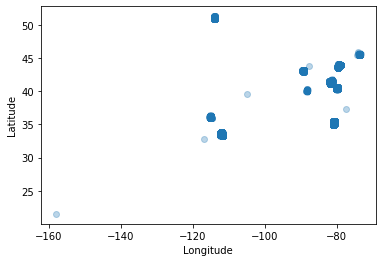

In [70]:
plt.scatter(x=restaurants.longitude, y=restaurants.latitude,alpha=0.3)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Looking at the range of latitude and longitude, I can see the dataset includes restaurants across the United States and Canada (note: the point in the bottom left corner is a restaurant in Hawaii) with a higher concentration of restaurants in the eastern part of the country. Having only US and Canada data reduces the concern for cultural or societal differences influencing the results of the data. However, this international data gap also means that any findings derived from this dataset may be localized to the United States only since consumers across the globe may behave differently. Food in particular is often a localized fare, so certain cuisines may be be disproportionately represented (e.g american, fast food), while others may be underrepresented (e.g. Thai food in the midwestern states of the US).

### User Preferences

One of the underlying assumptions of my project is that I can generalize a user's preferences based on their Yelp activity. Specifically, I plan to find out what cuisines/categories a user prefers based on the percentage of reviews that are for restaurants in that category and their average rating for that category. However, many users don't have many reviews, which is a limitation on how well their preferences can be inferred.

Text(0, 0.5, 'Number of Reviews per User')

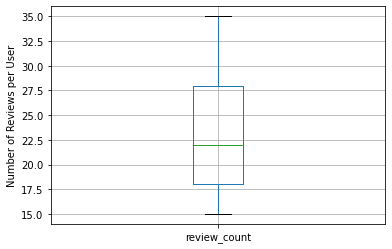

In [23]:
users.boxplot(column ='review_count')
plt.ylabel('Number of Reviews per User')

This boxplot shows the distribution of reviews in the filtered user data. I segmented the population to mitigate this problem, but whether 15 reviews is sufficient to derive such conclusions remains to be seen. The small smaple size can negatively impact the results by providing inaccurate assumptions on user preferences.

### Friends
For identifying social relationships, the only metric I have on hand is whether or not the two users are friends on Yelp. There is a data gap here in regards to the closeness of the friendship since this is a discrete measurement. As many social media users would know, being "friends" on a social media platform doesn't necessarily mean two individuals are actually close. If they are distant acquaitances, or even strangers, then the likelihood that they have similar tastes and lifestyles decreases, thus weakening my argument. It's hard to determine whether friendships on Yelp (or even in life) are genuine, but I tried to limit the users to those with friend amounts in a range of 20 to 40. This was reasoned by the idea that too few friends would make it hard to draw insights from, while too many friends risks the person not actually being real-life friends with their Yelp friends.

Text(0, 0.5, 'Number of Friends')

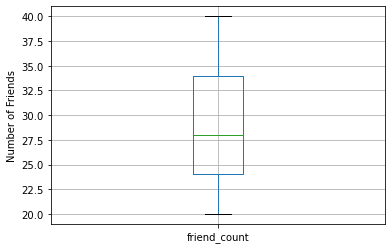

In [24]:
users.boxplot(column ='friend_count')
plt.ylabel('Number of Friends')

This boxplot shows the distribution of users with friends within the range of 20 to 40 people.